In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./data/final_loc_data.csv")
df.time = pd.to_datetime(df.time)
df.head()

,time,site,precip,rh,solrad,temp,lat,lon,city,state
0,1961-01-01,3103,NaN,NaN,NaN,NaN,35.08,111.4,FLAGSTAFF,AZ
1,1961-02-01,3103,NaN,NaN,NaN,NaN,35.08,111.4,FLAGSTAFF,AZ
2,1961-03-01,3103,NaN,NaN,NaN,NaN,35.08,111.4,FLAGSTAFF,AZ
3,1961-04-01,3103,NaN,NaN,NaN,NaN,35.08,111.4,FLAGSTAFF,AZ
4,1961-05-01,3103,NaN,NaN,NaN,NaN,35.08,111.4,FLAGSTAFF,AZ


In [3]:
# Get mean value throughout entire year for all places
df["year"] = pd.DatetimeIndex(df["time"]).year
multi = df.groupby(['city', 'state', 'year']).mean()
multi.head()

site  precip        rh  solrad       temp  \
city                   state year                                               
ABLIENE                TX    1961  13962    0.00  0.486046     0.0  22.275000   
                             1962  13962    0.00  0.420947     0.0  20.975000   
                             1963  13962    0.25  0.445084     0.0  22.733333   
                             1964  13962    0.00  0.413736     0.0  21.758333   
                             1965  13962    0.00  0.327877     0.0  24.766667   

                                     lat    lon  
city                   state year                
ABLIENE                TX    1961  32.26  99.41  
                             1962  32.26  99.41  
                             1963  32.26  99.41  
                             1964  32.26  99.41  
                             1965  32.26  99.41

In [4]:
multi = multi.reset_index(level=[0,1])
multi.head()

,city,state,site,precip,rh,solrad,temp,lat,lon
year,,,,,,,,,
1961,ABLIENE,TX,13962,0.00,0.486046,0.0,22.275000,32.26,99.41
1962,ABLIENE,TX,13962,0.00,0.420947,0.0,20.975000,32.26,99.41
1963,ABLIENE,TX,13962,0.25,0.445084,0.0,22.733333,32.26,99.41
1964,ABLIENE,TX,13962,0.00,0.413736,0.0,21.758333,32.26,99.41
1965,ABLIENE,TX,13962,0.00,0.327877,0.0,24.766667,32.26,99.41


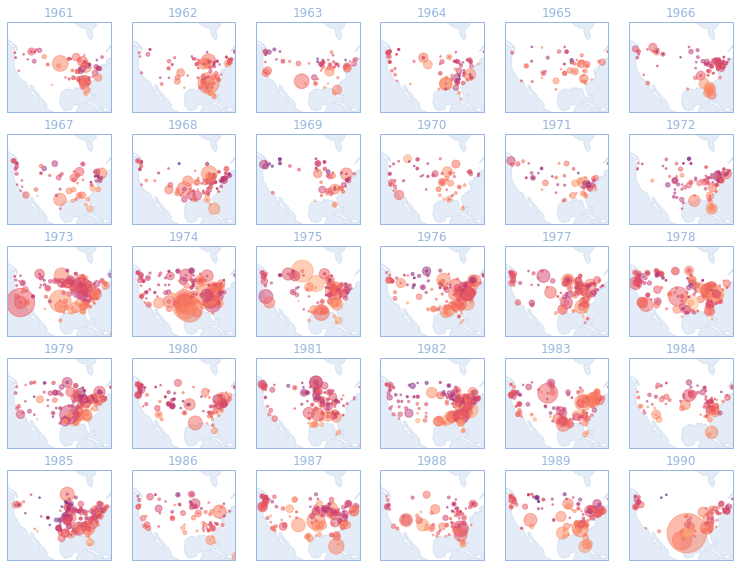

In [5]:
water = (0.59375 , 0.71484375, 0.8828125)
fig = plt.figure(figsize=(13, 12))

groups = multi.index.unique().sort_values()
nrows = np.ceil(np.sqrt(len(groups)))

for n in range(len(groups)):
    ax = fig.add_subplot(nrows, nrows, n+1, projection=ccrs.Mercator())
    year = groups[n]
    ax.set_title(year, color=water)
    temp = df[df['year'] == year]
    ax.scatter(360-temp['lon'], temp['lat'], transform=ccrs.PlateCarree(), 
               c=temp['temp'], s=temp['precip'], cmap='magma', 
               vmin=df["temp"].min(), vmax=df["temp"].max(), alpha=0.5)
    ax.add_feature(cfeature.OCEAN, alpha=0.25)
    xoff, yoff = 30, 20
    cx, cy = -98, 37
    ax.outline_patch.set_edgecolor(water)
    ax.set_extent([cx-xoff, cx+xoff, cy-yoff, cy+yoff], crs=ccrs.PlateCarree())

plt.show()